# CS5100 Final Project

Name: IVAN KWETEY

Goal: This assignment will allow you to apply your knowledge of machine learning that you have aquired in this course on a real-world dataset of your choosing per the assignment specifications.

Complete the notebook and demonstrate your mastery of the topic.

## Prerequisites

In this section describe any packages that need to be installed or any additional setup that needs to take place before trying to run code.

In [1]:
import re
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from Levenshtein import distance
from wordcloud import WordCloud
import plotly.express as px
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from keras.models import Model, Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from joblib import dump
import warnings
from textblob import TextBlob
from PIL import Image
from IPython.display import display

In [2]:
warnings. filterwarnings ('ignore')
nltk.download('stopwords')
nltk.download('punkt')
!pip install wordcloud matplotlib
!pip install joblib

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ivankwetey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ivankwetey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Problem

In this section, you will explain the problem you are trying to solve, the things you are trying to learn, and how you want to visualize the results.

The main problem which most review sentiment analysis tends to solve is user satisfaction and recipe recommendations. Recipe review sentiment analysis is a valuable tool for businesses in the food industry as it addresses various crucial aspects such as understanding customer preferences, assessing recipe quality, optimizing menus, and improving brand perception. By analyzing sentiments expressed in recipe reviews, businesses can gain insights into customer opinions, identify popular dishes, make data-driven decisions for menu optimization, generate personalized recommendations, and enhance marketing strategies. This analysis not only aids in improving user experience and satisfaction but also helps in staying competitive by benchmarking against rivals and refining business strategies based on customer feedback and sentiments.

My main goal is to understand how users feel about different recipes, are they generally positive, negative, or neutral? Additionally, I want to leverage sentiment analysis to identify popular recipes based on user reviews and see if sentiment analysis can enhance the accuracy of recipe recommendations for users. This project aims to uncover valuable insights into user preferences.

I'll be delving into several key areas as part of this sentiment analysis project. Firstly, I'll need to familiarize myself with various sentiment analysis techniques such as bag-of-words, and potentially learning models like SVM or Naive Bayes. Additionally, I'll focus on data preprocessing tasks such as text data cleaning, tokenization, stop word removal, and potentially duplications, addressing misspellings or slang in user reviews. Finally, I'll dive into model training and evaluation, which involves training a sentiment analysis model using labeled data (positive, negative, neutral) and assessing its performance using metrics like accuracy, precision, recall, and F1 score to ensure the model's effectiveness in capturing user sentiment accurately.

I'll visualize the sentiment distribution across all recipes to gain insights into the overall sentiment landscape—this will help me understand if users generally feel positive, negative, or neutral towards the recipes. Next, I'll compare sentiment scores between popular and less popular recipes to determine if sentiment correlates with recipe popularity, providing valuable insights into user preferences.With timestamp I will discover trends or patterns of sentiments in the last month of the dataset. 

## Data

In this section you will describe the dataset (corpus) you are using. Explain who collected the data, how they did it, the manner in which it was stored, the way you accessed the data, what steps you will have to do to clean it, and so on. Provide any relavent details.

####
The "Recipe Reviews and User Feedback Dataset" from https://archive.ics.uci.edu/dataset/911/recipe+reviews+and+user+feedback+dataset contains diverse data about recipe reviews and user interactions. It includes details like recipe name, ranking, recipe code, and user information such as user ID, name, and reputation score. Each review has a unique comment ID and additional attributes like creation time, reply count, and up/down-vote counts.

I follow a series of crucial steps to ensure the dataset is clean and suitable for accurate analysis. Firstly, I remove any duplicate entries, I handle missing values by dropping the corresponding rows/columns. Then, I preprocess the text data by tokenizing it, converting everything to lowercase, removing punctuation and stopwords, and applying stemming to standardize word forms. Also, I eliminate special characters and irrelevant information, encode categorical variables into numerical values, select relevant features, and normalize or scale numerical data as needed.

Ali,Amir, Matuszewski,Stanislaw , and Czupyt,Jacek. (2023). Recipe Reviews and User Feedback. UCI Machine Learning Repository. https://doi.org/10.24432/C5FG95.


In [3]:
#load the dataset for initial preview.
rdf = pd.read_csv('Recipe Reviews and User Feedback Dataset.csv')
rdf.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,2,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,3,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,3,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,5,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [4]:
rdf.nunique()

Unnamed: 0         15181
recipe_number        100
recipe_code          100
recipe_name          100
comment_id         14647
user_id            11585
user_name          11416
user_reputation       22
created_at          2591
reply_count            4
thumbs_up             62
thumbs_down           56
stars                  6
best_score           551
text               14765
dtype: int64

## Cleaning the Data


### Summary of cleaning activities.


I converted the 'created_at' column to datetime format.
I dropped rows with missing values (NaN).
I selected specific columns ('recipe_name', 'created_at', 'stars', 'text') for further processing.
I checked for and removed duplicate rows based on the 'text' column to ensure data cleanliness.
I created a function to clean HTML tags from the 'text' column using BeautifulSoup.
I removed special characters and converted text to lowercase for consistency.
I defined a pattern to remove and used the Levenshtein distance to filter out rows matching the pattern closely.
I tokenized the 'review' text into individual words for further analysis.
I removed English stopwords and performed stemming to reduce noise in the text data.
I mapped the 'stars' column to numerical sentiment categories (0 for negative, 1 for neutral, and 2 for positive) to prepare the data for sentiment analysis models

#### Step 1
This line of code converts Unix time (represented as seconds since the epoch) in the 'created_at' column of the DataFrame 'rdf' to datetime format.

In [5]:
#convert unix time to datetime format.
rdf['created_at'] = pd.to_datetime(rdf['created_at'], unit='s')
rdf.head(2)

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,2022-10-13 00:11:29,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,2022-10-09 01:08:07,0,7,0,2,724,Bush used to have a white chili bean and it ma...


In [6]:
df = rdf.dropna()

#### Step 2
Here I select the most important columns from the DataFrame 'rdf' and create a new DataFrame 'df' containing only these columns: 'recipe_name', 'created_at', 'stars', and 'text'.

In [7]:
#Choose most important columns to work with
df = rdf[["recipe_name","created_at","stars",'text']].copy()


In [8]:
df.head(3)

,recipe_name,created_at,stars,text
0,Creamy White Chili,2022-10-13 00:11:29,5,"I tweaked it a little, removed onions because ..."
1,Creamy White Chili,2022-10-09 01:08:07,2,Bush used to have a white chili bean and it ma...
2,Creamy White Chili,2022-09-28 22:35:57,3,I have a very complicated white chicken chili ...


#### Step 3

Here, I started by removing any rows with missing values in the DataFrame. This step ensures that I'm working with clean data without any NaN values. Next, I checked for duplicate rows based on the 'text' column. I identify duplicate rows, keeping the first occurrence of each duplicate. After confirming the presence of duplicates, I removed them which keeps the first occurrence of each duplicated row and modifies the DataFrame in place. Finally, I checked the shape of the DataFrame for further analysis.

In [9]:
# Check for and remove duplicate rows based on the 'text' column
duplicate_rows = df[df.duplicated(subset=['text'], keep='first')]
(duplicate_rows)

df.drop_duplicates(subset=['text'], keep='first', inplace=True)

In [10]:
df.shape

(14765, 4)

In [11]:
df.head(3)

,recipe_name,created_at,stars,text
0,Creamy White Chili,2022-10-13 00:11:29,5,"I tweaked it a little, removed onions because ..."
1,Creamy White Chili,2022-10-09 01:08:07,2,Bush used to have a white chili bean and it ma...
2,Creamy White Chili,2022-09-28 22:35:57,3,I have a very complicated white chicken chili ...


#### Step 4

I created a function called 'clean_html' that takes a text input and removes any HTML tags from it using BeautifulSoup. Inside the function, I checked if the input text is a string and then used BeautifulSoup to parse the HTML and extract the text content. If the input text is not a string (such as NaN or non-string values), the function returns an empty string. After defining the function, I applied it to the 'text' column of the DataFrame 'df'. Before applying the function, I filled any NaN values in the 'text' column with an empty string using .fillna(''). The resulting cleaned text was then stored in a new column called 'review' in the DataFrame.

In [12]:
# Removing html from text
def clean_html(text):
    if isinstance(text, str):  # Check if text is a string
        soup = BeautifulSoup(text, 'html.parser')
        return soup.get_text()
    else:
        return ''  # Return empty string for NaN or non-string values

# Apply the clean_html function to the 'review' column after replacing NaN with empty string
df.loc[:, 'review'] = df['text'].fillna('').apply(clean_html)

In [13]:
df.head(5)

,recipe_name,created_at,stars,text,review
0,Creamy White Chili,2022-10-13 00:11:29,5,"I tweaked it a little, removed onions because ...","I tweaked it a little, removed onions because ..."
1,Creamy White Chili,2022-10-09 01:08:07,2,Bush used to have a white chili bean and it ma...,Bush used to have a white chili bean and it ma...
2,Creamy White Chili,2022-09-28 22:35:57,3,I have a very complicated white chicken chili ...,I have a very complicated white chicken chili ...
3,Creamy White Chili,2022-08-29 15:43:28,3,"In your introduction, you mentioned cream chee...","In your introduction, you mentioned cream chee..."
4,Creamy White Chili,2022-10-04 20:03:43,5,Wonderful! I made this for a &#34;Chili/Stew&#...,"Wonderful! I made this for a ""Chili/Stew"" nigh..."


#### Step 5
I cleaned the 'review' column in the DataFrame 'df' by first removing special characters and then converting all text to lowercase. Additionally, I identified and removed rows containing URLs closely matching a specified pattern using Levenshtein distance calculations with a threshold of 20. This process ensured that the 'review' column only contained clean, lowercase text without special characters or URLs closely resembling the specified pattern.

In [14]:
# Remove special characters
df["review"] = df['review'].str.replace('[^a-zA-Z]',' ', regex=True)

In [15]:
# Lowercase the text
df['review'] = df['review'].str.lower()

In [16]:
pattern_to_remove = "https://pakrealestatenews.wordpress.com/2019/0", "https   pakistanpropertyinfo blogspot com"

# Function to calculate Levenshtein distance between two strings
def levenshtein_distance(s1, s2):
    return distance(s1, s2)

# Apply function to calculate distance and create a mask to remove rows
threshold_distance = 20
mask_to_remove = df['review'].apply(lambda review: levenshtein_distance(review, pattern_to_remove) <= threshold_distance)

df = df[~mask_to_remove]

# Display the filtered DataFrame
df.head()

,recipe_name,created_at,stars,text,review
0,Creamy White Chili,2022-10-13 00:11:29,5,"I tweaked it a little, removed onions because ...",i tweaked it a little removed onions because ...
1,Creamy White Chili,2022-10-09 01:08:07,2,Bush used to have a white chili bean and it ma...,bush used to have a white chili bean and it ma...
2,Creamy White Chili,2022-09-28 22:35:57,3,I have a very complicated white chicken chili ...,i have a very complicated white chicken chili ...
3,Creamy White Chili,2022-08-29 15:43:28,3,"In your introduction, you mentioned cream chee...",in your introduction you mentioned cream chee...
4,Creamy White Chili,2022-10-04 20:03:43,5,Wonderful! I made this for a &#34;Chili/Stew&#...,wonderful i made this for a chili stew nigh...


#### Step 6
I tokenized the 'review' column by splitting each review into individual tokens and then joined these tokens back into a single string for each review. I also obtained a list of English stopwords and defined stopwords to exclude from removal. Using a custom function, I removed specified stopwords and performed stemming on the tokenized reviews to clean and standardize the text data. This process resulted in a new column named 'cleaned_and_stemmed_review' containing the cleaned and stemmed review text, ready for further analysis


In [17]:
#Perform tokenization on the 'review'
df['review_tokens'] = df['review'].apply(lambda x: x.split())

df['joined_review_tokens'] = df['review_tokens'].apply(lambda tokens: ' '.join(tokens))

df[['review', 'review_tokens', 'joined_review_tokens']].head(3)

,review,review_tokens,joined_review_tokens
0,i tweaked it a little removed onions because ...,"[i, tweaked, it, a, little, removed, onions, b...",i tweaked it a little removed onions because o...
1,bush used to have a white chili bean and it ma...,"[bush, used, to, have, a, white, chili, bean, ...",bush used to have a white chili bean and it ma...
2,i have a very complicated white chicken chili ...,"[i, have, a, very, complicated, white, chicken...",i have a very complicated white chicken chili ...


In [18]:
# Get the list of stopwords for English
stop_words = set(stopwords.words("english"))

# Stopwords to exclude from removal
stopwords_to_exclude = ['don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'hadn', "hadn't", 
                        'doesn', "doesn't", 'hasn', "hasn't", 'haven', "haven't", "isn't", 'isn', 'ma', 'mightn', "mightn't", 
                        'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'no', "nor", 'not', 'shouldn', "shouldn't", 
                        'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Specify stopwords to exclude from removal
updated_stop_words = stop_words - set(stopwords_to_exclude)

# Convert the set back to a list
updated_stop_words_list = list(updated_stop_words)

# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Function to remove stop words and perform stemming
def preprocess_text(text):
    words = text.split()  # Tokenize the text into words
    filtered_words = [word for word in words if word.lower() not in updated_stop_words_list]
    stemmed_words = [porter_stemmer.stem(word) for word in filtered_words]  # Perform stemming
    return ' '.join(stemmed_words)  # Join the stemmed words back into a string

# Apply preprocessing (stop words removal and stemming)
df['cleaned_and_stemmed_review'] = df['joined_review_tokens'].apply(preprocess_text)

# Display the DataFrame with the cleaned and stemmed review column
df[['joined_review_tokens', 'cleaned_and_stemmed_review']].head(3)


,joined_review_tokens,cleaned_and_stemmed_review
0,i tweaked it a little removed onions because o...,tweak littl remov onion onion hater hous use i...
1,bush used to have a white chili bean and it ma...,bush use white chili bean made recip super sim...
2,i have a very complicated white chicken chili ...,complic white chicken chili recip made year ev...


In [19]:
#Review changes so far
df.head(3)

,recipe_name,created_at,stars,text,review,review_tokens,joined_review_tokens,cleaned_and_stemmed_review
0,Creamy White Chili,2022-10-13 00:11:29,5,"I tweaked it a little, removed onions because ...",i tweaked it a little removed onions because ...,"[i, tweaked, it, a, little, removed, onions, b...",i tweaked it a little removed onions because o...,tweak littl remov onion onion hater hous use i...
1,Creamy White Chili,2022-10-09 01:08:07,2,Bush used to have a white chili bean and it ma...,bush used to have a white chili bean and it ma...,"[bush, used, to, have, a, white, chili, bean, ...",bush used to have a white chili bean and it ma...,bush use white chili bean made recip super sim...
2,Creamy White Chili,2022-09-28 22:35:57,3,I have a very complicated white chicken chili ...,i have a very complicated white chicken chili ...,"[i, have, a, very, complicated, white, chicken...",i have a very complicated white chicken chili ...,complic white chicken chili recip made year ev...


#### Step 7

To provide a labelled data to train my models, I added a 'sentiment' column to the DataFrame 'df' to categorize sentiment based on star ratings. Ratings equal to or below 1 were labeled as negative sentiment (0), ratings between 2 and 3 as neutral sentiment (1), and ratings above 3 as positive sentiment (2). This categorization provides a numerical representation of sentiment for use in my learning models and further analysis. I also made some visualizations here.

In [20]:
# Define a function to map stars to sentiment categories with numerical labels
def map_sentiment_numerical(stars):
    if stars <= 1:
        return 0  # Negative sentiment
    elif stars <= 3:
        return 1  # Neutral sentiment
    else:
        return 2  # Positive sentiment

# Apply the function to create the sentiment column with numerical labels
df['sentiment'] = df['stars'].apply(map_sentiment_numerical)
label_df = df

In [21]:
label_df.head(3)

,recipe_name,created_at,stars,text,review,review_tokens,joined_review_tokens,cleaned_and_stemmed_review,sentiment
0,Creamy White Chili,2022-10-13 00:11:29,5,"I tweaked it a little, removed onions because ...",i tweaked it a little removed onions because ...,"[i, tweaked, it, a, little, removed, onions, b...",i tweaked it a little removed onions because o...,tweak littl remov onion onion hater hous use i...,2
1,Creamy White Chili,2022-10-09 01:08:07,2,Bush used to have a white chili bean and it ma...,bush used to have a white chili bean and it ma...,"[bush, used, to, have, a, white, chili, bean, ...",bush used to have a white chili bean and it ma...,bush use white chili bean made recip super sim...,1
2,Creamy White Chili,2022-09-28 22:35:57,3,I have a very complicated white chicken chili ...,i have a very complicated white chicken chili ...,"[i, have, a, very, complicated, white, chicken...",i have a very complicated white chicken chili ...,complic white chicken chili recip made year ev...,1


The plot below shows the most sentiments according to stars, and ther corresponding recipes.
We can see the recipes associated with top 5 reviews in each category of sentiments.
Stuffed Pepper Soup, Homemade Peanut Butter Cups, Skillet Shepherd's Pie, Moist Chocolate Cake and Mom's Meat Loaf were all time high with negative sentiments.

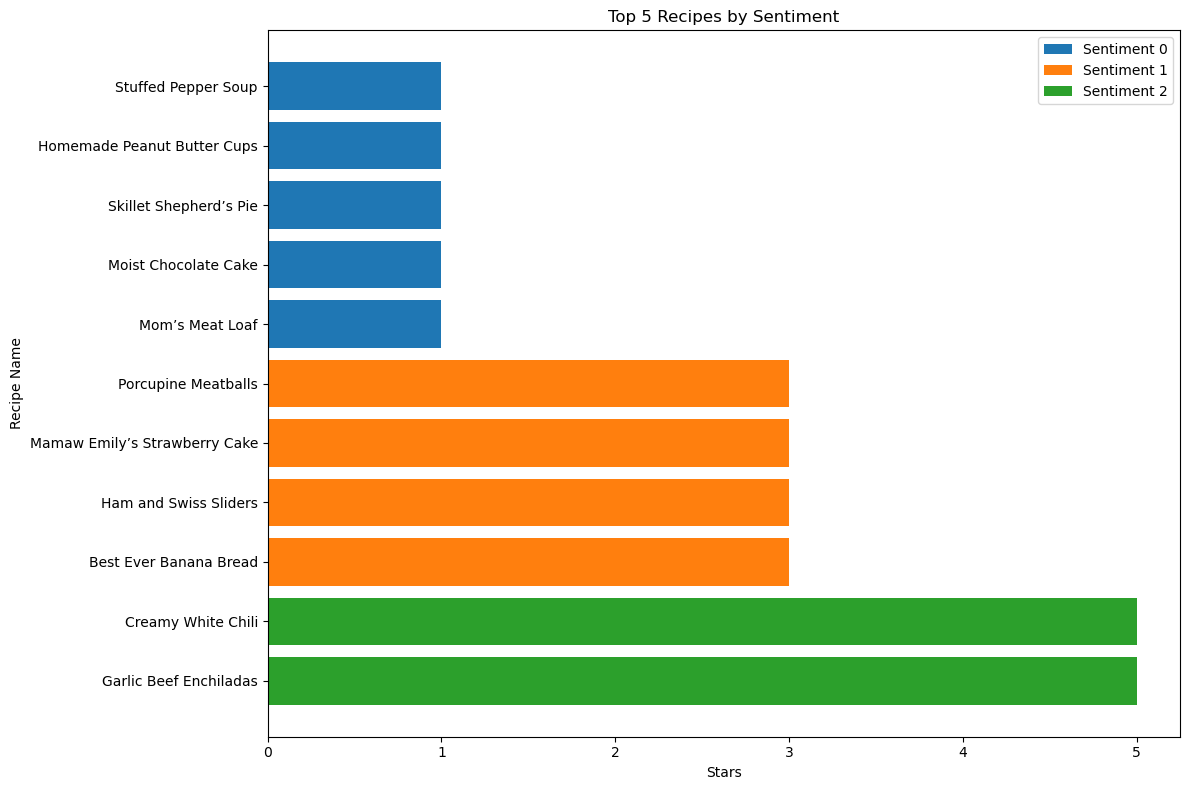

In [22]:
# Sort the DataFrame by 'stars' column in descending order to get highest rated recipes first
df_sorted = label_df.sort_values(by='stars', ascending=False)

# Group the DataFrame by 'sentiment' and get the top-rated recipes for each sentiment
top_n = 5
top_recipes_by_sentiment = df_sorted.groupby('sentiment').head(top_n)

# Plotting the top-rated recipes by sentiment using a grouped bar chart
plt.figure(figsize=(12, 8))

# Iterate over each sentiment category and plot a bar for the top recipes
for sentiment, group in top_recipes_by_sentiment.groupby('sentiment'):
    plt.barh(group['recipe_name'], group['stars'], label=f'Sentiment {sentiment}')

plt.xlabel('Stars')
plt.ylabel('Recipe Name')
plt.title(f'Top {top_n} Recipes by Sentiment')
plt.legend()
plt.gca().invert_yaxis() 
plt.tight_layout() 
plt.show()


The word cloud below shows common words associated with the ratings. Positive ratings frequently had words like delicious, loved and great, while Negative ratings had words like never, waste and terrible,
the neutral had a mix word cloud

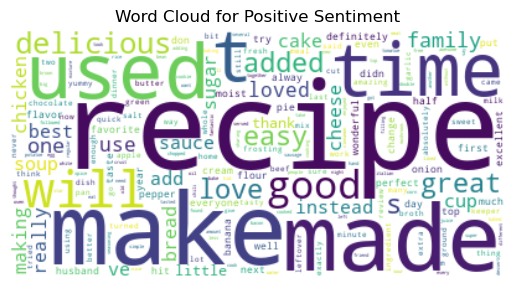

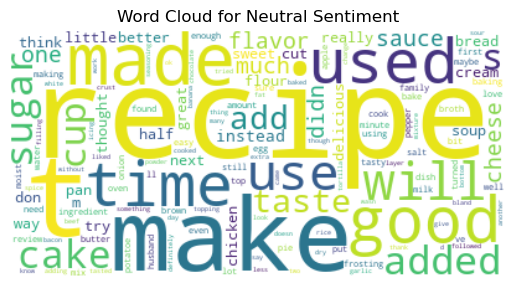

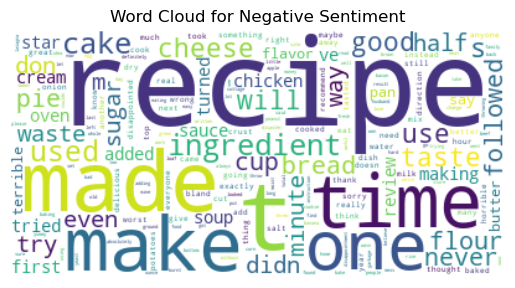

In [23]:
def word_cloud_gen(dataframe, category):
    # Map numerical category to sentiment label
    if category == 2:
        sentiment_label = "Positive"
    elif category == 1:
        sentiment_label = "Neutral"
    else:
        sentiment_label = "Negative"
    
    # Filter dataframe for the specified sentiment category and join reviews
    text = " ".join(review for review in dataframe[dataframe['sentiment'] == category]['review'])
    
    # Generate word cloud with specified settings
    word_cloud = WordCloud(collocations=False, background_color='white').generate(text)
    
    # Display the generated Word Cloud
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for {} Sentiment".format(sentiment_label))
    plt.show()

word_cloud_gen(label_df,2)
word_cloud_gen(label_df,1)
word_cloud_gen(label_df,0)

#####
Oesper, L., Merico, D., Isserlin, R., & Bader, G. D. (2011). WordCloud: a Cytoscape plugin to create a visual semantic summary of networks. Source Code for Biology and Medicine, 6(1), 7.

In [24]:
#Create a new Data Frame for model learning
ready_df = label_df[['cleaned_and_stemmed_review','sentiment']]

At this point, the DataFrame was reduced to two columns for sampling. the two needed columns : 'sentiment' and 'cleaned_and_stemmed_review' were extracted to a new DataFrame called ready_df 

In [25]:
ready_df.head(3)

,cleaned_and_stemmed_review,sentiment
0,tweak littl remov onion onion hater hous use i...,2
1,bush use white chili bean made recip super sim...,1
2,complic white chicken chili recip made year ev...,1


From the below analysis we can observe the dataset is unbalanced, so I performed an undersampling of the majority in the next section as the first step to model learning.

In [26]:
# Analyze the class counts
ready_df['sentiment'].value_counts()

sentiment
2    12248
1     1907
0      600
Name: count, dtype: int64

## Learning Model

In detailed and documented Python, walk the user through your code below similar to the Twitter assignment.

#### Step 8
I performed undersampling on my dataset to balance the classes for machine learning. First, I separated the majority classes (neutral and positive sentiments) from the minority class (negative sentiment). Then, I determined the size of the minority class. Using this size, I undersampled the majority classes to match the minority class's size. This was done by randomly selecting samples from the majority classes without replacement. The resulting balanced dataset, named 'balanced_data,' now contains an equal number of samples for each sentiment class after combining the undersampled majority classes with the original minority class. Finally, I shuffled the balanced data to mix samples from all classes, ensuring a more balanced and representative dataset for training models.

Next, I split my balanced dataset into training and testing sets for machine learning. Using the 'cleaned_and_stemmed_review' column as features and the 'sentiment' column as labels, I divided the data into X_train, y_train, X_test, and y_test sets with a test size of 20%. 

In [27]:
# undersampling the dataset to the size of the minority for learning.

# Separate majority (neutral and positive) and minority (negative) classes
majority_class = ready_df[ready_df['sentiment'].isin([1, 2])]  # Neutral and positive
minority_class = ready_df[ready_df['sentiment'] == 0]  # Negative

# Determine the size of the minority class (negative)
minority_size = len(minority_class)

# Undersample the majority classes to the size of the minority class (negative)
majority_undersampled = pd.concat([
    resample(majority_class[majority_class['sentiment'] == 1],  # Neutral
             replace=False, n_samples=minority_size, random_state=42),
    resample(majority_class[majority_class['sentiment'] == 2],  # Positive
             replace=False, n_samples=minority_size, random_state=42)
])

# Combine the undersampled majority classes with the original minority class (negative)
balanced_data = pd.concat([majority_undersampled, minority_class])

# Shuffle the balanced data to mix samples from all classes
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)


In [28]:
balanced_data.shape

(1800, 2)

In [29]:
# Split the balanced data into training and testing sets
X = balanced_data['cleaned_and_stemmed_review']  # feature column
y = balanced_data['sentiment']  # label column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1440,)
Shape of y_train: (1440,)
Shape of X_test: (360,)
Shape of y_test: (360,)


#### Step 9


##### Model 1 - LogisticRegression with TfidfVectorizer
I utilized a TF-IDF vectorizer with 5000 maximum features and an n-gram range of (1, 2) to process the text data. After fitting and transforming the training data (X_train), I trained a logistic regression classifier with a maximum iteration of 1000 using the TF-IDF transformed features (X_train_tfidf) and their corresponding labels (y_train).

Upon training, I made predictions on the test set (X_test_tfidf) and evaluated the model's performance using accuracy as the metric, achieving a satisfactory accuracy score. Additionally, I generated a classification report to delve deeper into the model's performance across different sentiment categories, providing insights into precision, recall, and F1-score for each sentiment class.

In [30]:
# Initialize the TF-IDF vectorizer without stop words removal
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Fit and transform the training data to obtain TF-IDF features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data using the fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [31]:
X_train_tfidfarray = X_train_tfidf.toarray()
X_test_tfidfarray = X_test_tfidf.toarray()

In [32]:
X_train_tfidfarray

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
# Initialize and train a logistic regression classifier 
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       103
           1       0.76      0.65      0.70       142
           2       0.71      0.77      0.74       115

    accuracy                           0.72       360
   macro avg       0.72      0.73      0.73       360
weighted avg       0.73      0.72      0.72       360



##### Model 2 - Naive Bayes classifier (MultinomialNB) with Bag-of-words
I used a CountVectorizer to transform the text data into a bag-of-words representation with a maximum of 5000 features and an n-gram range of (1, 2). After fitting and transforming the training data (X_train), I trained a Naive Bayes classifier (MultinomialNB) using the bag-of-words features (X_train_count) and their corresponding labels (y_train).

Subsequently, I made predictions on the test set (X_test_count) and evaluated the Naive Bayes model's performance using accuracy as the metric, achieving a satisfactory accuracy score. Additionally, I generated a classification report to provide detailed metrics such as precision, recall, and F1-score for each sentiment class, offering insights into the model's performance across different sentiment categories

In [34]:
# Initialize the CountVectorizer for bag-of-words representation
count_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, 2))

# Fit and transform the training data to obtain bag-of-words features
X_train_count = count_vectorizer.fit_transform(X_train)

# Transform the testing data using the fitted vectorizer
X_test_count = count_vectorizer.transform(X_test)

# Initialize and train a Naive Bayes classifier 
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_count, y_train)

# Make predictions on the test set
y_pred_nb = naive_bayes_classifier.predict(X_test_count)

# Evaluate the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy (Naive Bayes): {accuracy_nb:.2f}")

# Generate a classification report for the Naive Bayes model
print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))


Accuracy (Naive Bayes): 0.72

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       103
           1       0.73      0.68      0.70       142
           2       0.69      0.82      0.75       115

    accuracy                           0.72       360
   macro avg       0.72      0.72      0.72       360
weighted avg       0.72      0.72      0.72       360



##### Model 3 - SVM_classifier with TfidfVectorize
I start by initializing an SVM classifier with a linear kernel and proceed to train it using TF-IDF features (X_train_tfidfarray) along with their respective labels (y_train). Following the training phase, I utilize the trained SVM model to make predictions on the test set (X_test_tfidfarray), which allows me to evaluate its performance. Using the accuracy_score function, I calculate the accuracy of the SVM classifier (accuracy_svm) by comparing the predicted labels (y_pred_svm) against the actual labels (y_test). Additionally, I save the trained SVM classifier as a pickle file named 'svm_classifier_model.pkl' for future use. To gain more comprehensive insights into the classifier's performance, I generate a classification report that provides detailed metrics such as precision, recall, and F1-score across different classes within the test set.

In [35]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf') 

# Train the classifier using the TF-IDF features and labels
svm_classifier.fit(X_train_tfidfarray, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test_tfidfarray)

# Evaluate the SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

    
# Generate a classification report
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.72

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       103
           1       0.74      0.68      0.71       142
           2       0.72      0.77      0.74       115

    accuracy                           0.72       360
   macro avg       0.72      0.73      0.73       360
weighted avg       0.73      0.72      0.72       360



##### Model 4 - Neural Network model with TfidfVectorizer
I construct a neural network model using Keras, comprising layers like dense with ReLU activation, dropout for regularization, and softmax for multi-class output. The model is compiled with Adam optimizer and sparse categorical crossentropy loss. Training involves fitting the model to TF-IDF features with labels over five epochs, and its accuracy is evaluated on test data. The trained model is saved in Keras format for future use as 'neural_model.keras'.

In [37]:
# Define the neural network model
model = Sequential()
model.add(Dense(128, input_shape=(X_train_tfidfarray.shape[1],), activation='relu'))  # Input layer
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(3, activation='softmax'))  # Output layer 

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using the TF-IDF matrix and labels
model.fit(X_train_tfidfarray, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model using the test data
loss, accuracy = model.evaluate(X_test_tfidfarray, y_test)
print(f"Neural Network Accuracy: {accuracy:.2f}")


Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4190 - loss: 1.0951 - val_accuracy: 0.5764 - val_loss: 1.0770
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7867 - loss: 1.0260 - val_accuracy: 0.6285 - val_loss: 0.9837
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8600 - loss: 0.8075 - val_accuracy: 0.6701 - val_loss: 0.8193
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9490 - loss: 0.4593 - val_accuracy: 0.6632 - val_loss: 0.7208
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9838 - loss: 0.1874 - val_accuracy: 0.6458 - val_loss: 0.7541
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.7420 - loss: 0.6103
Neural Network Accuracy: 0.74


##### 
Martín Abadi, Ashish Agarwal, Paul Barham, Eugene Brevdo,
Zhifeng Chen, Craig Citro, Greg S. Corrado, Andy Davis,
Jeffrey Dean, Matthieu Devin, Sanjay Ghemawat, Ian Goodfellow,
Andrew Harp, Geoffrey Irving, Michael Isard, Rafal Jozefowicz, Yangqing Jia,
Lukasz Kaiser, Manjunath Kudlur, Josh Levenberg, Dan Mané, Mike Schuster,
Rajat Monga, Sherry Moore, Derek Murray, Chris Olah, Jonathon Shlens,
Benoit Steiner, Ilya Sutskever, Kunal Talwar, Paul Tucker,
Vincent Vanhoucke, Vijay Vasudevan, Fernanda Viégas,
Oriol Vinyals, Pete Warden, Martin Wattenberg, Martin Wicke,
Yuan Yu, and Xiaoqiang Zheng.
TensorFlow: Large-scale machine learning on heterogeneous systems,
2015. Software available from tensorflow.org

## Tuning and Feature Extraction

Add and describe code to perform Hyperparameter Tuning and Feature Extraction or PCA.

#### Step 10

##### Tuning 1: Neural Network
I created a neural network model with tunable hyperparameters using Keras. The create_model function defines the architecture and allows for adjustments to learning rate, dropout rate, and batch size. A grid search loop then iterates through specified hyperparameter ranges, training and evaluating models to find the best combination. The best-performing model's accuracy and hyperparameters are then displayed, aiding in model optimization.

I retrained the neural network model using the best hyperparameters obtained from the grid search. The create_model function was called with the optimal learning rate, dropout rate, and batch size to create the retrained model. After training the model on the training set, I evaluated its accuracy on the test set and saved the retrained model for future use.

In [38]:
# Define the neural network model with tunable hyperparameters
def create_model(learning_rate=0.001, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(128, input_shape=(X_train_tfidfarray.shape[1],), activation='relu'))  # Input layer
    model.add(Dropout(dropout_rate))  # Dropout layer to prevent overfitting
    model.add(Dense(64, activation='relu'))  
    model.add(Dense(3, activation='softmax')) 

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Define hyperparameters and ranges for tuning
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.2, 0.3, 0.4],
    'batch_size': [32, 64, 128]
}

# Perform grid search for hyperparameter tuning
best_accuracy = 0.0
best_params = {}

for learning_rate in param_grid['learning_rate']:
    for dropout_rate in param_grid['dropout_rate']:
        for batch_size in param_grid['batch_size']:
            print(f"Training model with learning rate={learning_rate}, dropout rate={dropout_rate}, batch size={batch_size}")
            
            model = create_model(learning_rate=learning_rate, dropout_rate=dropout_rate)
            model.fit(X_train_tfidfarray, y_train, epochs=10, batch_size=batch_size, validation_split=0.2, verbose=0)
            
            _, accuracy = model.evaluate(X_test_tfidfarray, y_test, verbose=0)
            
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'learning_rate': learning_rate, 'dropout_rate': dropout_rate, 'batch_size': batch_size}

print(f"Best Accuracy: {best_accuracy:.2f}")
print("Best Hyperparameters:", best_params)


Training model with learning rate=0.001, dropout rate=0.2, batch size=32
Training model with learning rate=0.001, dropout rate=0.2, batch size=64
Training model with learning rate=0.001, dropout rate=0.2, batch size=128
Training model with learning rate=0.001, dropout rate=0.3, batch size=32
Training model with learning rate=0.001, dropout rate=0.3, batch size=64
Training model with learning rate=0.001, dropout rate=0.3, batch size=128
Training model with learning rate=0.001, dropout rate=0.4, batch size=32
Training model with learning rate=0.001, dropout rate=0.4, batch size=64
Training model with learning rate=0.001, dropout rate=0.4, batch size=128
Training model with learning rate=0.01, dropout rate=0.2, batch size=32
Training model with learning rate=0.01, dropout rate=0.2, batch size=64
Training model with learning rate=0.01, dropout rate=0.2, batch size=128
Training model with learning rate=0.01, dropout rate=0.3, batch size=32
Training model with learning rate=0.01, dropout rat

#####
Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825–2830.

In [39]:
# Retrain the model using the best hyperparameters
retrained_model = create_model(learning_rate=best_params['learning_rate'], 
                               dropout_rate=best_params['dropout_rate'])
retrained_model.fit(X_train_tfidfarray, y_train, epochs=7, batch_size=best_params['batch_size'], validation_split=0.2, verbose=0)

# Evaluate the retrained model on the test set
loss, accuracy = retrained_model.evaluate(X_test_tfidfarray, y_test, verbose=0)
print("Retrained Model Accuracy:", accuracy)


Retrained Model Accuracy: 0.7222222089767456


##### Tuning 2: LogisticRegression
I initialized a TF-IDF vectorizer without stop words removal and used it to transform the training and testing data. Then, I defined a hyperparameter grid for tuning with valid penalty-solver combinations for a Logistic Regression classifier. 

I performed grid search with cross-validation to find the best model based on accuracy. After obtaining the best model, I made predictions on the test set and evaluated its performance. The accuracy of the best model was printed, along with a classification report. Additionally, I displayed the best hyperparameters found during the grid search process.

In [40]:
# Initialize the TF-IDF vectorizer without stop words removal
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Fit and transform the training data to obtain TF-IDF features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data using the fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Define hyperparameters grid for tuning with valid penalty-solver combinations
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'penalty': ['l2'],  # Only 'l2' penalty is valid for 'lbfgs' solver
}


# Initialize Logistic Regression classifier
classifier = LogisticRegression(max_iter=1000)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_train_tfidf, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_tfidf)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy:.2f}")

# Generate a classification report for the best model
print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred))

# Print the best hyperparameters
print("\nBest Hyperparameters:")
print(grid_search.best_params_)


Best Model Accuracy: 0.72

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       103
           1       0.76      0.65      0.70       142
           2       0.71      0.77      0.74       115

    accuracy                           0.72       360
   macro avg       0.72      0.73      0.73       360
weighted avg       0.73      0.72      0.72       360


Best Hyperparameters:
{'C': 1, 'penalty': 'l2'}


## Visuals

Below, generate the visuals that will explain the results you are getting and show what you hoped to learn from the data.

##### LogisticRegression Tuning visuals.

##### What we can deduce from this

Fist of all both inirial and tuned models resulted the same.

Rows: The actual classes (e.g., Class 0, Class 1, Class 2)
Columns: The predicted classes made by the initial model

Interpretation:
Row 1: Class 0 (True Negative): 80 instances were correctly predicted as Class 0.
Row 2: Class 1 (True Positive): 92 instances were correctly predicted as Class 1.
Row 3: Class 2 (True Positive): 89 instances were correctly predicted as Class 2.
The off-diagonal elements represent misclassifications:

Row 1, Column 2: 10 instances of Class 0 were mistakenly predicted as Class 1.
Row 1, Column 3: 13 instances of Class 0 were mistakenly predicted as Class 2.
Row 2, Column 1: 27 instances of Class 1 were mistakenly predicted as Class 0.
Row 2, Column 3: 23 instances of Class 1 were mistakenly predicted as Class 2.
Row 3, Column 1: 7 instances of Class 2 were mistakenly predicted as Class 0.
Row 3, Column 2: 19 instances of Class 2 were mistakenly predicted as Class 1

Initial Model Accuracy: 0.72

Confusion Matrix for Initial Model:
[[80 10 13]
 [27 92 23]
 [ 7 19 89]]


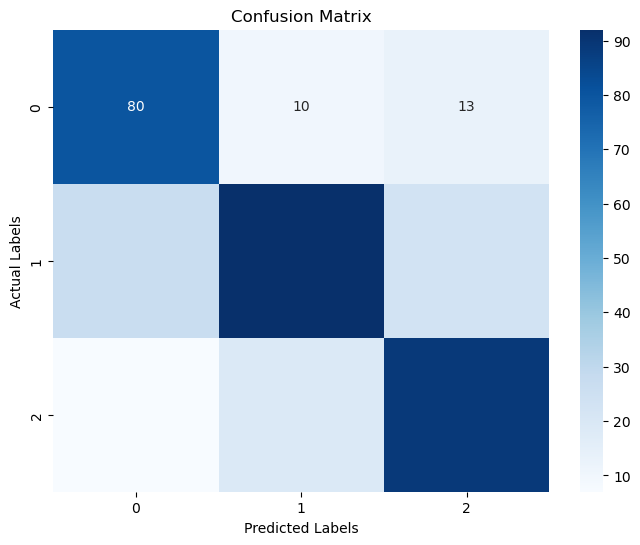

Tuned Model Accuracy: 0.72

Confusion Matrix for Tuned Model:
[[80 10 13]
 [27 92 23]
 [ 7 19 89]]


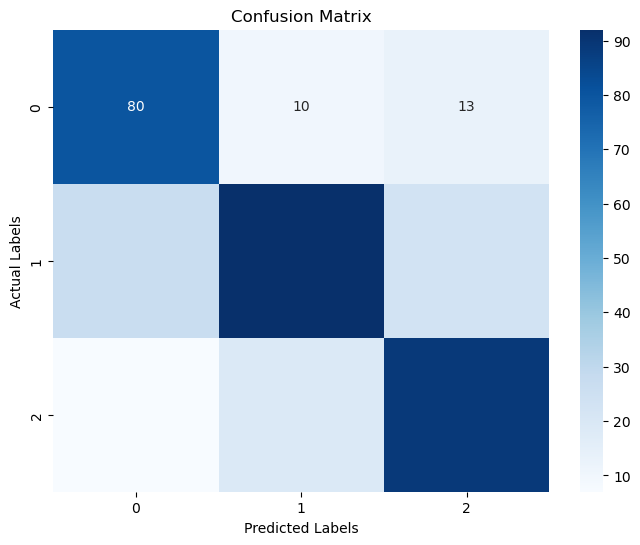

In [41]:
def plot_confusion_matrix(cm, labels):
    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')
    plt.show()

def train_initial_model(X_train, y_train, X_test, y_test):
    # Define initial model
    classifier_initial = LogisticRegression(max_iter=1000)
    classifier_initial.fit(X_train, y_train)
    y_pred_initial = classifier_initial.predict(X_test)

    # Evaluate initial model
    accuracy_initial = accuracy_score(y_test, y_pred_initial)
    print(f"Initial Model Accuracy: {accuracy_initial:.2f}")

    # Generate confusion matrix for initial model
    cm_initial = confusion_matrix(y_test, y_pred_initial)
    print("\nConfusion Matrix for Initial Model:")
    print(cm_initial)

    # Plot confusion matrix for initial model
    plot_confusion_matrix(cm_initial, labels=classifier_initial.classes_)

    return classifier_initial

def train_tuned_model(X_train, y_train, X_test, y_test):
    # Define tuned model
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
        'penalty': ['l2'],  # Only 'l2' penalty is valid for 'lbfgs' solver
    }
    tfidf_vectorizer_tuned = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
    X_train_tfidf_tuned = tfidf_vectorizer_tuned.fit_transform(X_train)
    X_test_tfidf_tuned = tfidf_vectorizer_tuned.transform(X_test)

    classifier_tuned = LogisticRegression(max_iter=1000)
    grid_search = GridSearchCV(estimator=classifier_tuned, param_grid=param_grid, cv=3)
    grid_search.fit(X_train_tfidf_tuned, y_train)
    best_model_tuned = grid_search.best_estimator_

    # Make predictions on the test set using the tuned model
    y_pred_tuned = best_model_tuned.predict(X_test_tfidf_tuned)

    # Evaluate the tuned model
    accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
    print(f"Tuned Model Accuracy: {accuracy_tuned:.2f}")

    # Generate confusion matrix for tuned model
    cm_tuned = confusion_matrix(y_test, y_pred_tuned)
    print("\nConfusion Matrix for Tuned Model:")
    print(cm_tuned)

    # Plot confusion matrix for tuned model
    plot_confusion_matrix(cm_tuned, labels=best_model_tuned.classes_)

    # Save the best tuned model as a pickle file
    with open('best_logistic_regression_model_tuned.pkl', 'wb') as file:
        pickle.dump(best_model_tuned, file)

    # Save the tuned TF-IDF vectorizer as a separate pickle file
    with open('tfidf_vectorizer_tuned.pkl', 'wb') as file:
        pickle.dump(tfidf_vectorizer_tuned, file)

    return best_model_tuned

# Train and evaluate the initial model
initial_model = train_initial_model(X_train_tfidf, y_train, X_test_tfidf, y_test)

# Train and evaluate the tuned model
tuned_model = train_tuned_model(X_train, y_train, X_test, y_test)


##### 
The Matplotlib Development Team. (2023). Matplotlib: Visualization with Python (v3.8.0). Zenodo. https://doi.org/10.5281/zenodo.8347255

## Demonstration with the model. Chosen model = LogisticRegression

#### Input demo
When I run this code, I utilizes a function named predict_sentiment to analyze the sentiment of a given text input. In the provided demo section, an example input text ("This recipe was bad.") is used to showcase the functionality of the predict_sentiment function. Here the code prints out the predicted sentiment category, which might be 'Negative' in this case, indicating a negative sentiment associated with the input text.

In [42]:
# Load the logistic regression model from the saved pickle file
with open('best_logistic_regression_model_tuned.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Function to predict sentiment for a given text input
def predict_sentiment(text):
    # Transform the input text using the fitted TF-IDF vectorizer
    text_tfidf = tfidf_vectorizer.transform([text])
    
    # Use the loaded logistic regression model to predict sentiment
    sentiment_label = loaded_model.predict(text_tfidf)[0]
    
    # Map sentiment labels to their respective categories
    sentiment_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
    sentiment_category = sentiment_mapping[sentiment_label]
    
    return sentiment_category

# Demo: Input text for sentiment analysis
input_text = "This recipe was bad."

# Predict sentiment using the loaded logistic regression model
predicted_sentiment = predict_sentiment(input_text)
print("Predicted Sentiment:", predicted_sentiment)


Predicted Sentiment: Negative


#### Applying it on our reviews:

When I run this code, I can then apply the logistic regression model to predict sentiment labels for each text instance. These predicted sentiments are added to the DataFrame as a new column ('LR_sentiment'), allowing me to easily analyze and understand the sentiment of each text entry. This streamlined process of loading pre-trained models and applying them to new data enhances the efficiency of sentiment analysis tasks.

In [43]:
final_df = label_df[['recipe_name','cleaned_and_stemmed_review','sentiment']]
final_df

,recipe_name,cleaned_and_stemmed_review,sentiment
0,Creamy White Chili,tweak littl remov onion onion hater hous use i...,2
1,Creamy White Chili,bush use white chili bean made recip super sim...,1
2,Creamy White Chili,complic white chicken chili recip made year ev...,1
3,Creamy White Chili,introduct mention cream chees none list ingredi,1
4,Creamy White Chili,wonder made chili stew night dinner church eve...,2
...,...,...,...
15028,Quick Cream of Mushroom Soup,big disappoint could tast flour anyon make rec...,0
15030,Egg Roll Noodle Bowl,go ahead serv threw remaind,0
15031,Mamaw Emily’s Strawberry Cake,huge disappoint could not recommend,0
15034,Mamaw Emily’s Strawberry Cake,start make year ago call strawberri jello cake...,1


In [44]:
# Load the saved model and TF-IDF vectorizer from pickle files
with open('best_logistic_regression_model_tuned.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

with open('tfidf_vectorizer.pkl', 'rb') as file:
    loaded_tfidf_vectorizer = pickle.load(file)

text_data = final_df['cleaned_and_stemmed_review']

# Transform the preprocessed text data using the loaded TF-IDF vectorizer
X_test_tfidf = loaded_tfidf_vectorizer.transform(text_data)

# Use the loaded model to predict sentiment on the transformed text data
y_pred = loaded_model.predict(X_test_tfidf)

# Add the predicted sentiment to DataFrame
final_df['LR_sentiment'] = y_pred

# Display 
print(final_df[['cleaned_and_stemmed_review','LR_sentiment']])

                              cleaned_and_stemmed_review  LR_sentiment
0      tweak littl remov onion onion hater hous use i...             2
1      bush use white chili bean made recip super sim...             2
2      complic white chicken chili recip made year ev...             2
3        introduct mention cream chees none list ingredi             0
4      wonder made chili stew night dinner church eve...             2
...                                                  ...           ...
15028  big disappoint could tast flour anyon make rec...             0
15030                        go ahead serv threw remaind             0
15031                huge disappoint could not recommend             0
15034  start make year ago call strawberri jello cake...             1
15035  tri recip first time use egg white rather egg ...             1

[14755 rows x 2 columns]


#### Initial sentiment vs LR sentiment

In [45]:
final_df

,recipe_name,cleaned_and_stemmed_review,sentiment,LR_sentiment
0,Creamy White Chili,tweak littl remov onion onion hater hous use i...,2,2
1,Creamy White Chili,bush use white chili bean made recip super sim...,1,2
2,Creamy White Chili,complic white chicken chili recip made year ev...,1,2
3,Creamy White Chili,introduct mention cream chees none list ingredi,1,0
4,Creamy White Chili,wonder made chili stew night dinner church eve...,2,2
...,...,...,...,...
15028,Quick Cream of Mushroom Soup,big disappoint could tast flour anyon make rec...,0,0
15030,Egg Roll Noodle Bowl,go ahead serv threw remaind,0,0
15031,Mamaw Emily’s Strawberry Cake,huge disappoint could not recommend,0,0
15034,Mamaw Emily’s Strawberry Cake,start make year ago call strawberri jello cake...,1,1


#### Distribution of sentiments
We can see the model predicted more negatives and neutrals sentiments than our initial sentiment based off of user rating stars, and also we can see that the initial sentiment has a high positive count than the model's.

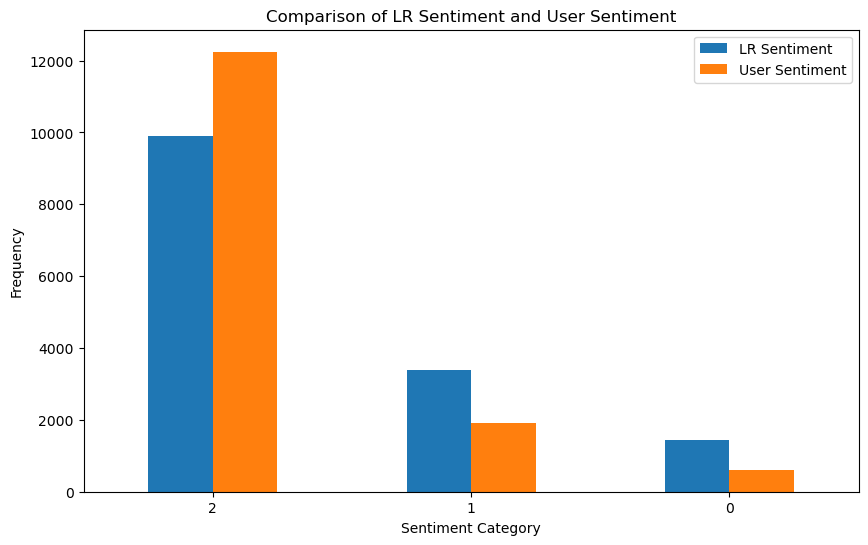

In [46]:
# Count the occurrences of each sentiment category in both columns
lr_sentiment_counts = final_df['LR_sentiment'].value_counts()
user_sentiment_counts = final_df['sentiment'].value_counts()

# Create a DataFrame from the counts
comparison_df = pd.DataFrame({'LR Sentiment': lr_sentiment_counts, 'User Sentiment': user_sentiment_counts})
 
# Plotting the bar plot
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of LR Sentiment and User Sentiment')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend()
plt.show()


####
Finally we can deduce that highest of the positive reviews for the last month of this data, was recorded on the 21. This tells us that recipes in this dataset would continue to have majority of reviews being positive in the months to come.

<Figure size 1000x600 with 0 Axes>

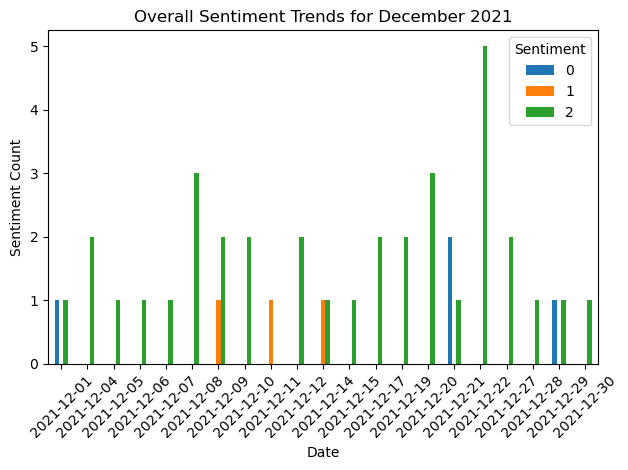

In [47]:
# Convert 'created_at' column to datetime if it's not already
df['created_at'] = pd.to_datetime(df['created_at'])

# Filter data for December 2021
december_data = df[(df['created_at'].dt.year == 2021) & (df['created_at'].dt.month == 12)]

# Group by date and sentiment, then count occurrences
sentiment_counts = december_data.groupby([december_data['created_at'].dt.date, 'sentiment']).size().unstack(fill_value=0)

# Convert inf values to NaN
sentiment_counts = sentiment_counts.replace([np.inf, -np.inf], np.nan)

# Plotting as a bar plot
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', stacked=False)
plt.title('Overall Sentiment Trends for December 2021')
plt.xlabel('Date')
plt.ylabel('Sentiment Count')
plt.legend(title='Sentiment', labels=sentiment_counts.columns)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Refection

### 1. What issues did you encounter when aquiring and cleaning the data?

It was hard to find a dataset for recent years but I am glad to have found this one. Cleaning the data was tough part, also I realised most of the reviews didnt even have stars rating. Some very positive reviews had stars as zero, which would grately affect the model prediction. I had to manually fix most of this, reading almost all of the reviews to make sure at least the ratings matched their reviews in order to have an initial sentiment label for my supervised learning. that was very challenging.

There were also irrelevant texts in the reviews such as URL's. I had to take care of these as well. there were also spelling mistakes in the reviews, i tried to correct the spellings with textblob but after i realised it corrected alof ot words and made more errors in the process hence changing the meanings of the sentence. for example there was a review as " I have a very complicated white chicken chili .....", the spell correction changed it to "I have a very complicated white chicken child..". which didnt make sense.

I left the spell checking out and hoped the dataset did not have alot of spelling mistakes.
   
### 2. What features did you use in your final model and why were others excluded?

My final model was the 'best_logistic_regression_model.pkl'. I used the TF-IDF vectorizer with a maximum of 5000 features and bigram tokenization to transform the training and testing data for sentiment analysis. For tuning the logistic regression model, I explored different hyperparameters using grid search with cross-validation. The hyperparameters included the regularization strength (C) with values of 0.001, 0.01, 0.1, 1, and 10, and the L2 penalty. The goal was to find the best combination of hyperparameters that maximizes model accuracy. After the grid search, my 'best model' was selected based on its performance on the validation sets, and its accuracy was evaluated on the test set. My 'best model' and the TF-IDF vectorizer were then saved for future use.

As to why the others were excluded, firstly most of them didnt perform any better at the initial learning. The Neural Network in particular outperformed the LR at the tuning stage but any time I run the code the accuracy changes so i felt it was not going to be reliable, another thing was I had difficulty installing libraries for cross validation for the NN model. The Logistic regression was reliable as it gave me a constant accuracy any time I run the code and also I had no problems with libraires or any other thing.

### 3. Which ML methods did you use and why? Which performed best before you started tuning? Did things change after tuning?

I chose to use Naive Bayes, Logistic Regression, Neural Networks and SVMs in my food recipe review sentiment analysis for several reasons. Naive Bayes is known for its simplicity and efficiency in handling large datasets, making it a good choice for initial exploration. Logistic Regression, on the other hand, is a straightforward linear model that works well for binary classification tasks like sentiment analysis. Neural Networks offer a more complex approach, capable of capturing intricate patterns in text data, which can improve accuracy. Lastly, SVMs are effective for high-dimensional data and can handle non-linear relationships, providing robustness and flexibility in modeling sentiment across different types of text inputs. By leveraging these diverse models, I aimed to explore a range of approaches and select the one that best suits my project.

### 4. What was your accuracy before and then after cross validation?
My accuracy before and after cross validation was 72.

### 5. What was the most challenging part of this project?
The most challenging part of this project was cleaning and preparing the data for the learning model. Once that was done the rest of was left to experimenting and learning new things. I really enjoyed this sentiment analysis. I hope someday I can train a model with close to 100% accuracy score.